In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.style
import matplotlib as mpl
mpl.style.use('seaborn')

from itertools import combinations
from collections import Counter

%matplotlib inline

# Task 1: Load the DataSets and Merge into a single File

In [10]:
jan = pd.read_csv('Sales_January_2019.csv')
feb = pd.read_csv('Sales_February_2019.csv')
mar = pd.read_csv('Sales_March_2019.csv')
apr = pd.read_csv('Sales_April_2019.csv')
may = pd.read_csv('Sales_May_2019.csv')
jun = pd.read_csv('Sales_June_2019.csv')
jul = pd.read_csv('Sales_July_2019.csv')
aug = pd.read_csv('Sales_August_2019.csv')
sep = pd.read_csv('Sales_September_2019.csv')
otb = pd.read_csv('Sales_October_2019.csv')
nov = pd.read_csv('Sales_November_2019.csv')
dec = pd.read_csv('Sales_December_2019.csv')

In [11]:
dataframes = [jan,feb,mar,apr,may,jun,jul,aug,sep,otb,nov,dec]
total_sales = pd.concat(dataframes)
total_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


# Task 2: Convert Variables

In [12]:
total_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 10.0+ MB


In [13]:
total_sales['Quantity Ordered'] = pd.to_numeric(total_sales['Quantity Ordered'],errors='coerce')
total_sales['Price Each'] = pd.to_numeric(total_sales['Price Each'],errors='coerce')
total_sales['Order Date'] = pd.to_datetime(total_sales['Order Date'],errors='coerce')

In [14]:
total_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    185950 non-null float64
Price Each          185950 non-null float64
Order Date          185950 non-null datetime64[ns]
Purchase Address    186305 non-null object
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 10.0+ MB


# Task 3: Clean up the Data

In [15]:
total_sales[total_sales.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaT,NaN
678,NaN,NaN,NaN,NaN,NaT,NaN
797,NaN,NaN,NaN,NaN,NaT,NaN
876,NaN,NaN,NaN,NaN,NaT,NaN
1073,Order ID,Product,NaN,NaN,NaT,Purchase Address
...,...,...,...,...,...,...
23748,Order ID,Product,NaN,NaN,NaT,Purchase Address
23996,NaN,NaN,NaN,NaN,NaT,NaN
24192,Order ID,Product,NaN,NaN,NaT,Purchase Address
24222,Order ID,Product,NaN,NaN,NaT,Purchase Address


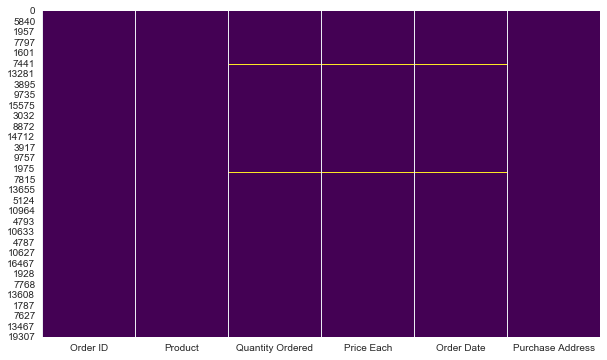

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(total_sales.isna(),cbar=False,cmap='viridis')

In [17]:
total_sales.dropna(inplace=True)

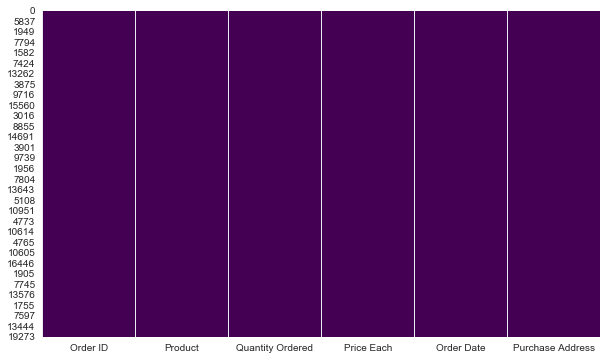

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(total_sales.isna(),cbar=False,cmap='viridis')

# Task 4: Augment DataFrame

In [19]:
total_sales['Total Price'] = total_sales['Quantity Ordered']*total_sales['Price Each']
total_sales['City'] = total_sales['Purchase Address'].apply(lambda x: x.split(',')[1])
total_sales['State'] = total_sales['Purchase Address'].apply(lambda x: x.split(',')[2][:3])
total_sales['Location'] = total_sales['City']+', '+total_sales['State']

In [20]:
total_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,City,State,Location
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,Boston,MA,"Boston, MA"
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,Portland,OR,"Portland, OR"
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,San Francisco,CA,"San Francisco, CA"
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,Los Angeles,CA,"Los Angeles, CA"
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,Austin,TX,"Austin, TX"


## Question 1: What was the best month for sales? How much was earned that month?

In [21]:
month_earn = pd.DataFrame()
month_earn['Total Price'] = total_sales.groupby(total_sales['Order Date'].dt.month).sum()['Total Price']
month_earn['Quantity Ordered'] = total_sales.groupby(total_sales['Order Date'].dt.month).sum()['Quantity Ordered']
month_earn

,Total Price,Quantity Ordered
Order Date,,
1,1.822257e+06,10903.0
2,2.202022e+06,13449.0
3,2.807100e+06,17005.0
4,3.390670e+06,20558.0
5,3.152607e+06,18667.0
6,2.577802e+06,15253.0
7,2.647776e+06,16072.0
8,2.244468e+06,13448.0
9,2.097560e+06,13109.0


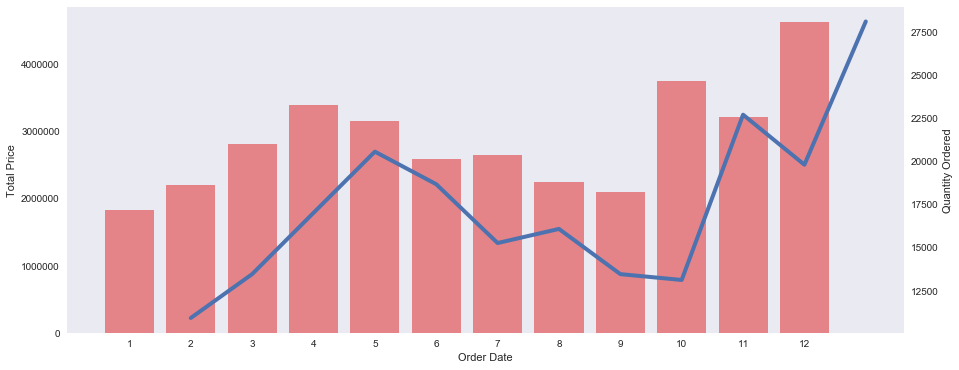

In [22]:
fig, ax = plt.subplots(figsize=(15,6))
g = sns.barplot(data=month_earn,y='Total Price',x=month_earn.index,color='r',alpha=.5)
ax2 = ax.twinx()
g = sns.lineplot(data=month_earn,y='Quantity Ordered',x=month_earn.index,lw=4)
ax.grid(False)
ax2.grid(False)

## Question 2: What city had the highest number of sales

In [23]:
city_earn = pd.DataFrame()
city_earn['Total Price'] = total_sales.groupby('Location').sum()['Total Price']
city_earn['Quantity Ordered'] = total_sales.groupby('Location').sum()['Quantity Ordered']
city_earn

,Total Price,Quantity Ordered
Location,,
"Atlanta, GA",2.795499e+06,16602.0
"Austin, TX",1.819582e+06,11153.0
"Boston, MA",3.661642e+06,22528.0
"Dallas, TX",2.767975e+06,16730.0
"Los Angeles, CA",5.452571e+06,33289.0
"New York City, NY",4.664317e+06,27932.0
"Portland, ME",4.497583e+05,2750.0
"Portland, OR",1.870732e+06,11303.0
"San Francisco, CA",8.262204e+06,50239.0


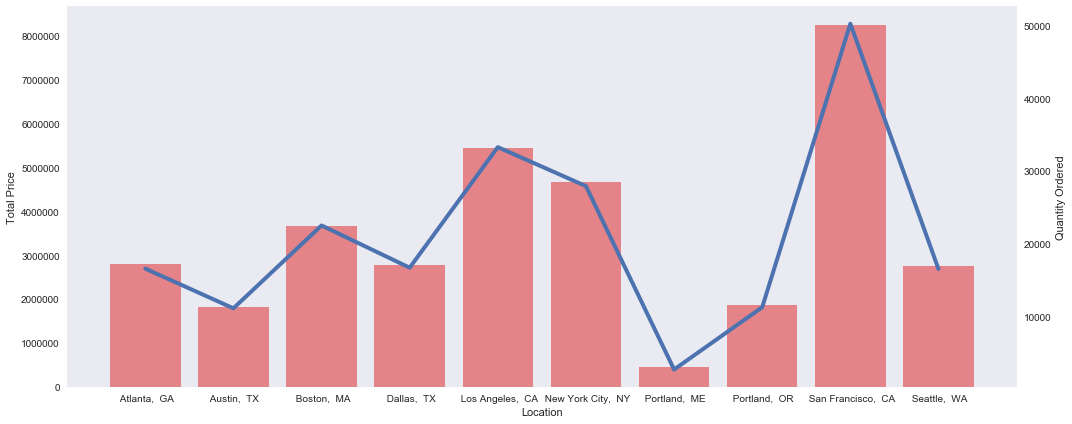

In [24]:
fig, ax = plt.subplots(figsize=(15,6))
g = sns.barplot(data=city_earn,y='Total Price',x=city_earn.index,color='r',alpha=.5)
ax2 = ax.twinx()
g = sns.lineplot(data=city_earn,y='Quantity Ordered',x=city_earn.index,lw=4)
ax.grid(False)
ax2.grid(False)
plt.tight_layout()

## Question 3: What time is most recommended to display advertising?

In [25]:
hour_earn = pd.DataFrame()
hour_earn['Total Price'] = total_sales.groupby(total_sales['Order Date'].dt.hour).sum()['Total Price']
hour_earn['Quantity Ordered'] = total_sales.groupby(total_sales['Order Date'].dt.hour).sum()['Quantity Ordered']
hour_earn

,Total Price,Quantity Ordered
Order Date,,
0,713721.27,4428.0
1,460866.88,2619.0
2,234851.44,1398.0
3,145757.89,928.0
4,162661.01,937.0
5,230679.82,1493.0
6,448113.00,2810.0
7,744854.12,4556.0
8,1192348.97,7002.0


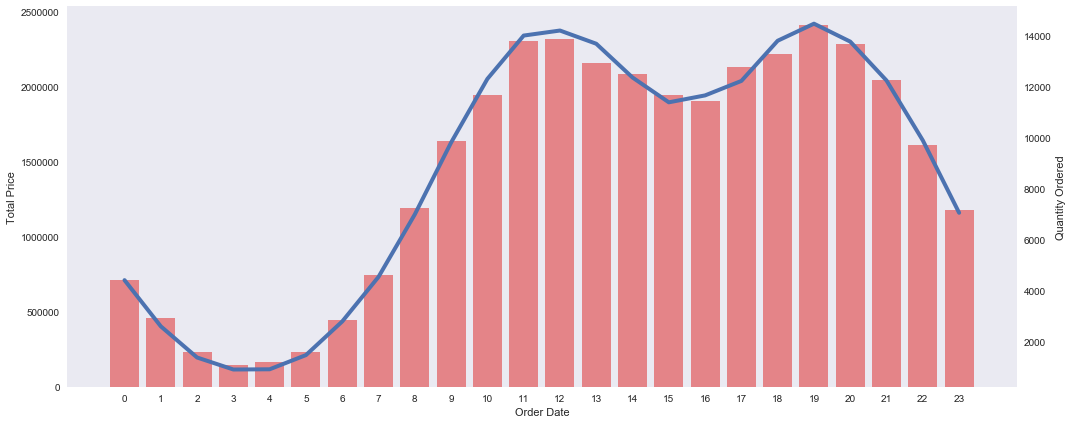

In [26]:
fig, ax = plt.subplots(figsize=(15,6))
g = sns.barplot(data=hour_earn,y='Total Price',x=hour_earn.index,color='r',alpha=.5)
ax2 = ax.twinx()
g = sns.lineplot(data=hour_earn,y='Quantity Ordered',x=hour_earn.index,lw=4)
ax.grid(False)
ax2.grid(False)
plt.tight_layout()

## Question 4: What product sold the most? Revenue and Number of sales

In [27]:
products = pd.DataFrame()
products['Total Price'] = total_sales.groupby('Product').sum()['Total Price']
products['Quantity Ordered'] = total_sales.groupby('Product').sum()['Quantity Ordered']
products

,Total Price,Quantity Ordered
Product,,
20in Monitor,454148.71,4129.0
27in 4K Gaming Monitor,2435097.56,6244.0
27in FHD Monitor,1132424.50,7550.0
34in Ultrawide Monitor,2355558.01,6199.0
AA Batteries (4-pack),106118.40,27635.0
AAA Batteries (4-pack),92740.83,31017.0
Apple Airpods Headphones,2349150.00,15661.0
Bose SoundSport Headphones,1345565.43,13457.0
Flatscreen TV,1445700.00,4819.0


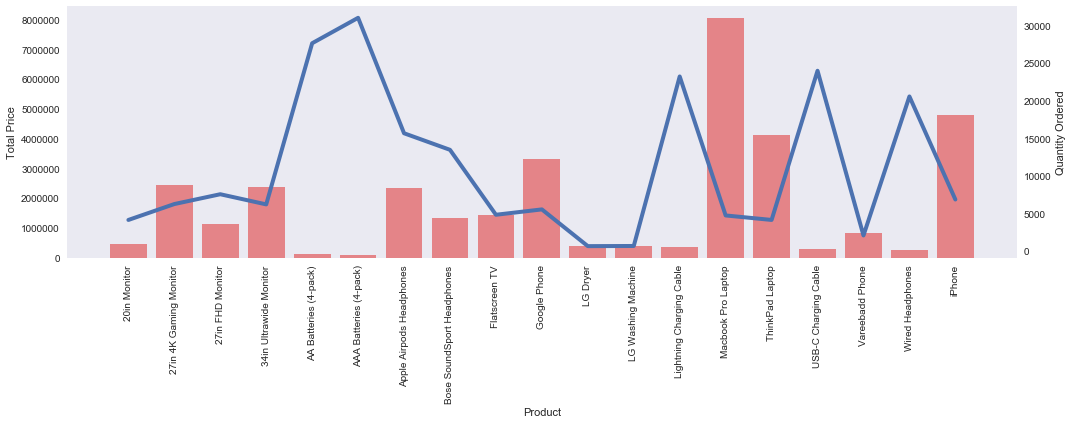

In [28]:
fig, ax = plt.subplots(figsize=(15,6))
g = sns.barplot(data=products,y='Total Price',x=products.index,color='r',alpha=.5)
ax2 = ax.twinx()
g = sns.lineplot(data=products,y='Quantity Ordered',x=products.index,lw=4)
ax.grid(False)
ax2.grid(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()

## Question 5: What products are most often sold together

In [30]:
duplicated = total_sales[total_sales['Order ID'].duplicated(keep=False)==True]
duplicated

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,City,State,Location
41,141275,USB-C Charging Cable,1.0,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",11.95,Austin,TX,"Austin, TX"
42,141275,Wired Headphones,1.0,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",11.99,Austin,TX,"Austin, TX"
57,141290,Apple Airpods Headphones,1.0,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",150.00,Los Angeles,CA,"Los Angeles, CA"
58,141290,AA Batteries (4-pack),3.0,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",11.52,Los Angeles,CA,"Los Angeles, CA"
133,141365,Vareebadd Phone,1.0,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",400.00,New York City,NY,"New York City, NY"
...,...,...,...,...,...,...,...,...,...,...
25028,319584,Wired Headphones,1.0,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",11.99,Portland,OR,"Portland, OR"
25040,319596,iPhone,1.0,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",700.00,New York City,NY,"New York City, NY"
25041,319596,Lightning Charging Cable,1.0,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",14.95,New York City,NY,"New York City, NY"
25076,319631,34in Ultrawide Monitor,1.0,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",379.99,Austin,TX,"Austin, TX"


In [31]:
duplicated['Grouped'] = duplicated.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
duplicated = duplicated[['Order ID','Grouped']].drop_duplicates()
duplicated

/Users/leonardofaverobocardi/anaconda3/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Grouped
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
24977,319536,"Macbook Pro Laptop, Wired Headphones"
24998,319556,"Google Phone, Wired Headphones"
25027,319584,"iPhone, Wired Headphones"
25040,319596,"iPhone, Lightning Charging Cable"


In [32]:
count = Counter()

for row in duplicated['Grouped']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list,2)))
    
for k, v in count.most_common(10):
    print(k,':',v)

('iPhone', 'Lightning Charging Cable') : 1005
('Google Phone', 'USB-C Charging Cable') : 987
('iPhone', 'Wired Headphones') : 447
('Google Phone', 'Wired Headphones') : 414
('Vareebadd Phone', 'USB-C Charging Cable') : 361
('iPhone', 'Apple Airpods Headphones') : 360
('Google Phone', 'Bose SoundSport Headphones') : 220
('USB-C Charging Cable', 'Wired Headphones') : 160
('Vareebadd Phone', 'Wired Headphones') : 143
('Lightning Charging Cable', 'Wired Headphones') : 92


In [33]:
count = Counter()

for row in duplicated['Grouped']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list,3)))
    
for k, v in count.most_common(10):
    print(k,':',v)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') : 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') : 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') : 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') : 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') : 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') : 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') : 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') : 16
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') : 5
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') : 5
